In [ ]:
!pip install tensorflow_decision_forests
!pip install tensorflow --upgrade

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.15.0
TensorFlow Decision Forests v1.8.1


In [ ]:
dataset_df = pd.read_csv('train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (10407, 13)


In [ ]:
# Display the first 5 examples
dataset_df.head(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [ ]:
df_describe = dataset_df.describe()
# Calcular el coeficiente de variación (CV) y añadirlo
cv = dataset_df.std() / dataset_df.mean()
df_describe.loc['cv'] = cv
df_describe

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.000000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.386460,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.500000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.000000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.500000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.000000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000
cv,0.577433,1.750235,1.102236,0.614607,0.151945,0.693519,0.128747,0.128431,0.111175,0.190669,0.127861,0.907956,0.361627


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


allelectrons_Total: Probablemente se refiere al número total de electrones en los elementos del mineral.

density_Total: La densidad total del mineral.

allelectrons_Average, val_e_Average, atomicweight_Average, ionenergy_Average, el_neg_chi_Average: Estas son probablemente medidas promedio de propiedades atómicas y electrónicas de los elementos en el mineral (número de electrones, peso atómico, energía de ionización, electronegatividad, etc.).

R_vdw_element_Average, R_cov_element_Average: Radios promedio, posiblemente el radio de Van der Waals y el radio covalente de los elementos.

zaratio_Average: Esto podría ser una proporción de carga atómica o algo similar.

density_Average: La densidad promedio de los elementos en el mineral.

Hardness: La dureza del mineral, probablemente en la escala de Mohs.

In [ ]:
# Revisar valores faltantes
print(dataset_df.isnull().sum())

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64


No Hay valores nulos

In [ ]:
from scipy import stats

# Supongamos que este es tu DataFrame
# dataset_df = pd.read_csv('tu_archivo.csv')  # Descomenta y ajusta esto para cargar tu dataset

# Calculamos el puntaje Z para todas las columnas
z_scores = np.abs(stats.zscore(dataset_df))

# Configuramos un umbral (por ejemplo, 3)
threshold = 2.5

# Filtramos el DataFrame para mantener solo las filas donde todos los valores son menores que el umbral
dataset_df = dataset_df[(z_scores < threshold).all(axis=1)]

In [ ]:
# Eliminar una columna
# Reemplaza 'nombre_columna' con el nombre real de la columna que deseas eliminar
dataset_df = dataset_df.drop('id', axis=1)

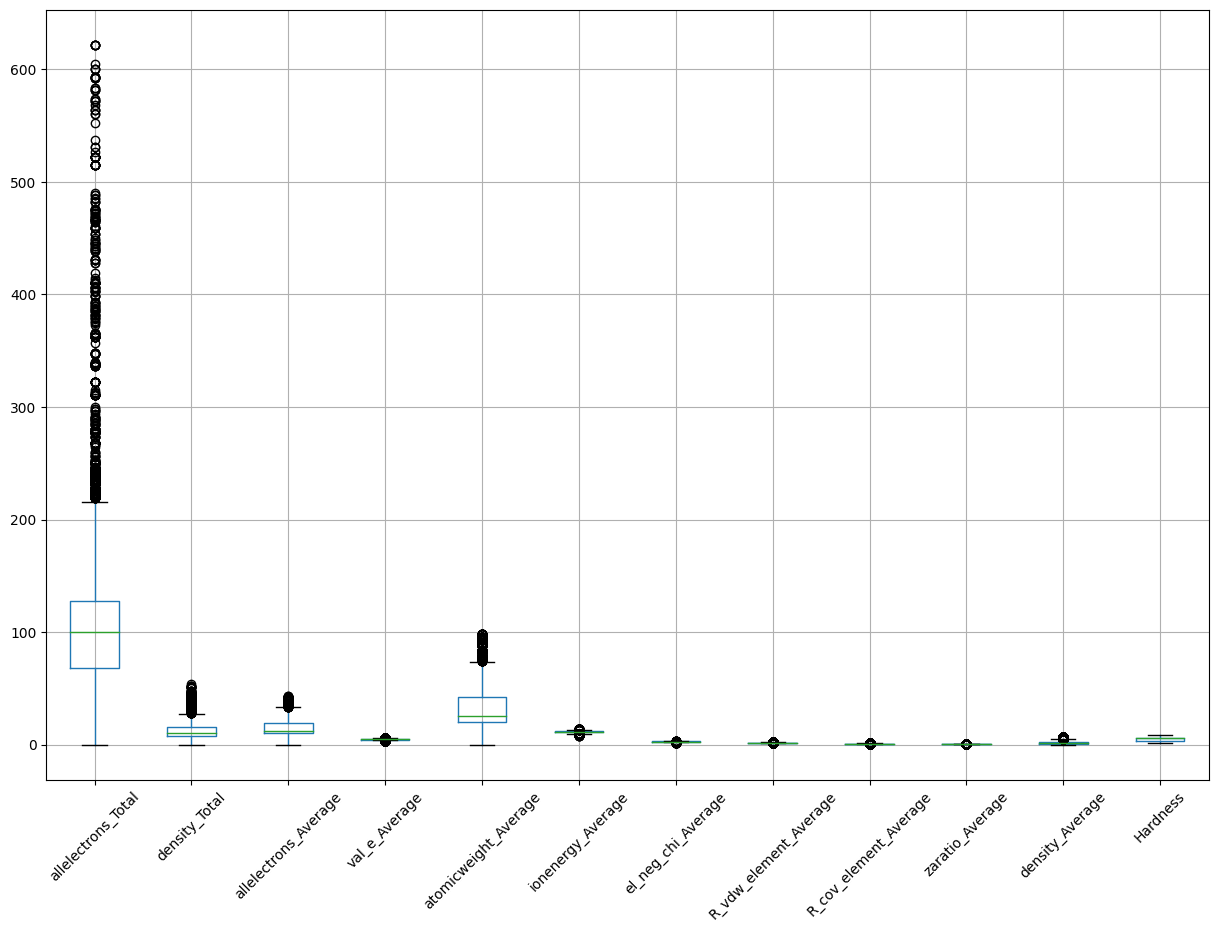

In [ ]:
# Diagramas de caja
dataset_df.boxplot(rot=45, figsize=(15, 10))
plt.show()

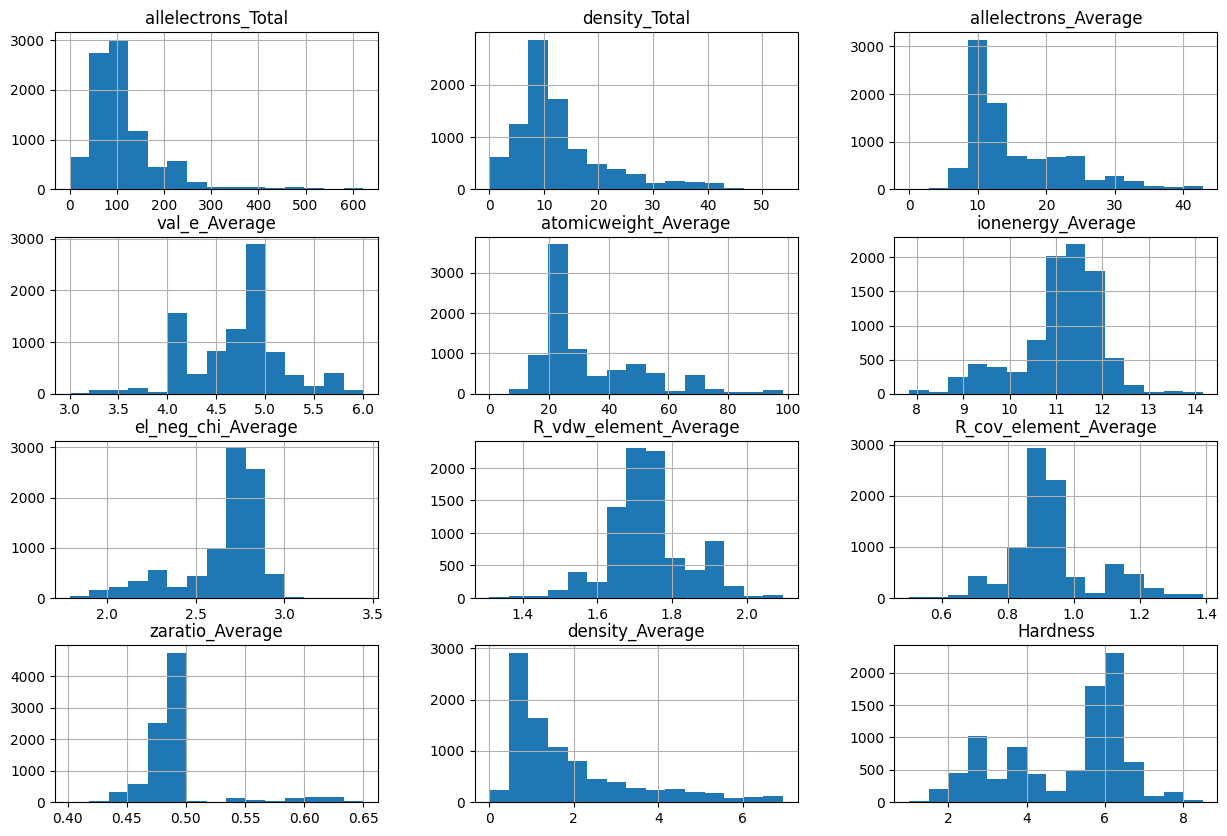

In [ ]:
# Histogramas para todas las columnas numéricas
dataset_df.hist(bins=15, figsize=(15, 10))
plt.show()

Podriamos hacer un clustering a las variables, incluida Hardness, luego montar un clasificador que separe en grupos de hardness y finalmente un regressor que prediga el Hardness

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Elegir la columna de dureza de Mohs
mohs_hardness = dataset_df['Hardness'].values.reshape(-1, 1)

# Aplicar KMeans para clustering
kmeans = KMeans(n_clusters=3, n_init=10)  # El número de clusters es un ejemplo, ajusta según tus datos
dataset_df['hardness_cluster'] = kmeans.fit_predict(mohs_hardness)

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_df.drop(['Hardness', 'hardness_cluster'], axis=1)  # Asumiendo que estas son las variables predictoras
y_class = dataset_df['hardness_cluster']  # Para clasificación
y_reg = dataset_df['Hardness']  # Para regresión

# Dividir en entrenamiento y prueba
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(X, y_class, y_reg, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modelo de clasificación
clf = RandomForestClassifier()
clf.fit(X_train, y_class_train)


RandomForestClassifier()

In [ ]:
# Predecir los clusters en el conjunto de prueba
y_class_pred = clf.predict(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

# Agregar la predicción de cluster al conjunto de entrenamiento de regresión
X_train_reg = X_train.copy()
X_train_reg['predicted_cluster'] = clf.predict(X_train)

# Modelo de regresión
reg = LinearRegression()
reg.fit(X_train_reg, y_reg_train)


LinearRegression()

In [ ]:
from sklearn.metrics import classification_report, mean_squared_error

# Evaluación del clasificador
y_class_pred = clf.predict(X_test)
print(classification_report(y_class_test, y_class_pred))

# Evaluación del regresor
X_test_reg = X_test.copy()
X_test_reg['predicted_cluster'] = y_class_pred
y_reg_pred = reg.predict(X_test_reg)
print('MSE:', mean_squared_error(y_reg_test, y_reg_pred))


              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1130
           1       0.56      0.51      0.53       376
           2       0.42      0.20      0.27       296

    accuracy                           0.71      1802
   macro avg       0.58      0.54      0.55      1802
weighted avg       0.67      0.71      0.68      1802

MSE: 1.8654654676191398


In [ ]:
# Aquí puedes realizar análisis adicionales o predicciones específicas según tus necesidades.



In [ ]:
import pandas as pd

# Carga el conjunto de datos de prueba
test_df = pd.read_csv('test.csv')

# Carga el archivo de envío de muestra
submission_df = pd.read_csv('sample_submission.csv')

# Guardar la columna 'id'
ids = test_df['id']

# Eliminar la columna 'id' para la predicción
test_df_for_prediction = test_df.drop('id', axis=1)


In [ ]:
# Asumiendo que tienes funciones o pasos de preprocesamiento, aplícalos a test_df
# Por ejemplo: test_df = preprocess(test_df)


In [ ]:
# Clasifica cada muestra en el conjunto de prueba
predicted_clusters = clf.predict(test_df_for_prediction)


In [ ]:
# Añade la predicción del cluster al conjunto de prueba
test_df_for_prediction['predicted_cluster'] = predicted_clusters

In [ ]:
# Predice la dureza usando el modelo de regresión
predicted_hardness = reg.predict(test_df_for_prediction)

In [ ]:
# Crear un DataFrame con ids y las predicciones de dureza
updated_submission = pd.DataFrame({
    'id': ids,
    'Hardness': predicted_hardness
})



In [ ]:
# Guardar el DataFrame actualizado en un nuevo archivo CSV
updated_submission.to_csv('updated_submission.csv', index=False)

